In [97]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib
from matplotlib import pyplot as plt 
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

# sys.path.append("Z:/Mehrzad/ddm_code/PyDDM-main_dcimgFiles/PyDDM-main/PyDDM") #must point to the PyDDM folder
# import ddm_analysis_and_fitting as ddm

####write the directory address that you chose
import sys
sys.path.append("X:\\Katarina M\\SIA_ANALYSIS\\SIA_analysis_packages\\SIA_analysis_packages\\ddmanalysis\\")
import tiff_file
import ddm_clean as ddm

import xlsxwriter
import pandas as pd   
import math

In [98]:
import time
import datetime
import math
import scipy
from scipy import optimize
import scipy.special as sc

In [205]:
###write down the address directory that you chose 
data_dir="X:\\Katarina M\\MT_cells_0,8,16,32_1172023\\32od\\mt_tif\\"
data_file="32od_60x_3_mt.tif"

In [206]:
####what is key ????
im=tiff_file.imread(data_dir+data_file)
# print("shape of ims is %i %i %i" %ims.shape)
# #print("So %i frames" %ims.shape[0])
# print("So %i frames of %ix%i pixels each" %ims.shape)

In [207]:
# im.shape

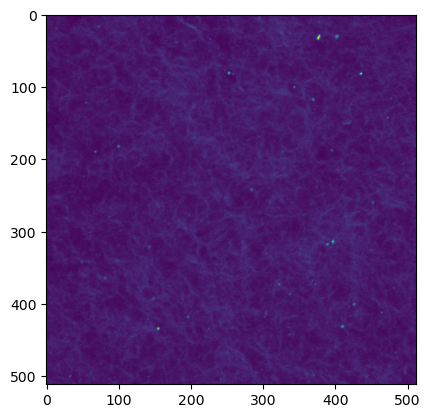

In [208]:
plt.figure()
plt.imshow(im[10,:,:])

In [209]:
# im_main=im.reshape(1,im.shape[0],im.shape[1])

In [210]:
# im_main.shape

In [211]:
im.shape

(21, 512, 512)

In [212]:
def im_corr(image, filter=False, filtersize=512):
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean()
    image = image/image.std()
    corr_im = np.real(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    rav_corr = ddm.newRadav(corr_im)
    return corr_im, rav_corr

In [213]:
def filtimage(image, filtersize=0):
    image = image*1.0 - uf(image,filtersize)
    return image
#plt.matshow(filtimage(ims[0],filtersize=1000))
#plt.matshow(ims[0])
#plt.matshow(ims[0]-filtimage(ims[0],filtersize=256))

In [214]:
corr_im=np.zeros_like(im[:,:,:])
corr_ravs=np.zeros((im.shape[0],int(im.shape[1]/2)))
filtersize=256
print(im.shape[0])
print(corr_ravs.shape[1])
print(corr_ravs.shape[0])

for i in range(im.shape[0]):
    corr_im[i], temp=im_corr(im[i,:,:],filter=True,filtersize=filtersize)
    corr_ravs[i]=temp[:corr_ravs.shape[1]]

21
256
21


In [215]:
num=1
corr_ravs_pick=corr_ravs.shape[0]/num
corr_ravs_pick


# print(corr_ravs.shape[1])

# print(corr_ravs.shape[1])




gr_p=np.zeros((int(corr_ravs_pick),corr_ravs.shape[1]))

n=0
for i in range(int(corr_ravs_pick)):
    gr_p[i,:]=corr_ravs[n,:]
    n=n+num

    
gravgse=np.zeros((gr_p.shape[1],3))


###this is the pixel/um ; for 60x is 0.41, for 20x is 0.8, for 4x: 6.21
m2p_ratio=0.80
gf1dsize=2
xvalues=np.arange(corr_ravs.shape[1])*m2p_ratio
x_vals=np.zeros((len(xvalues),1))




for i in range(len(xvalues)):
    x_vals[i,0]=xvalues[i]

for i in range(gr_p.shape[1]):
    gravgse[i,0]=x_vals[i,0]
    
    gravgse[i,1]=np.mean(gr_p[:,i])
    gravgse[i,2]=np.std(gr_p[:,i])/np.sqrt(gr_p.shape[0])
    
    






                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
df_tot=pd.DataFrame(gr_p[:,:])
dfavgse=pd.DataFrame(gravgse[:,:])

with pd.ExcelWriter('gr_32od_60x_3.xlsx',mode='w',engine='openpyxl') as writer:
    df_tot.to_excel(writer,sheet_name="gr_32od_60x_1allframe-movie1",header=False, index=False)
    
with pd.ExcelWriter('gr_32od_60x_3.xlsx', mode='a',engine='openpyxl') as writer:
    dfavgse.to_excel(writer,sheet_name="gr_32od_60x_allframe_avgse",header=False, index=False)
    
    



In [14]:
# corr_ravs.shape[0]

In [29]:
#####selecting every 10th frames
num=16
corr_ravs_pick=corr_ravs.shape[0]/num
corr_ravs_pick


# print(corr_ravs.shape[1])

# print(corr_ravs.shape[1])




# gr_p=np.zeros((int(corr_ravs_pick)+1,corr_ravs.shape[1]-1))
gr_p=np.zeros((int(corr_ravs_pick),corr_ravs.shape[1]-1))

n=0
for i in range(int(corr_ravs_pick)):
    gr_p[i,:]=corr_ravs[n,1:]
    n=n+num

    
gravgse=np.zeros((gr_p.shape[1],3))
# grse=np.zeros((gr_p.shape[1],1))    



m2p_ratio=0.41
gf1dsize=2
xvalues=np.arange(corr_ravs.shape[1])*m2p_ratio
x_vals=np.zeros((len(xvalues)-1,1))




for i in range(len(xvalues)-1):
    x_vals[i,0]=xvalues[i+1]

for i in range(gr_p.shape[1]):
    gravgse[i,0]=x_vals[i,0]
    
    gravgse[i,1]=np.mean(gr_p[:,i])
    gravgse[i,2]=np.std(gr_p[:,i])/np.sqrt(gr_p.shape[0])
    
    







df_tot=pd.DataFrame(gr_p[:,:])
dfavgse=pd.DataFrame(gravgse[:,:])

with pd.ExcelWriter('gr_c128_1.xlsx', mode='a',engine='openpyxl') as writer:
    df_tot.to_excel(writer,sheet_name="gr_c128_10min",header=False, index=False)
    
with pd.ExcelWriter('gr_c128_1.xlsx', mode='a',engine='openpyxl') as writer:
    dfavgse.to_excel(writer,sheet_name="gr_c128_10min_avgse",header=False, index=False)
    
    



In [30]:
grtei=np.zeros((gravgse[:,1].shape[0]))
tei=(1/(2*math.exp(1)))

for i in range(gravgse[:,1].shape[0]):
    grtei[i]=tei*gravgse[i,1]

gi=np.where((gravgse[:,1]>grtei))
grmx=np.max(gi)
clgr=np.zeros((1,1))
clgr[0,0]=gravgse[grmx,1]

df_crlnth=pd.DataFrame(clgr[:,:])




with pd.ExcelWriter('gr_c128_1.xlsx', mode='a',engine='openpyxl') as writer:
    df_crlnth.to_excel(writer,sheet_name="crlenght_10min",header=False, index=False)




In [ ]:
(gravgse[:,1]).shape[0]

In [ ]:
        df_r=df =pd.read_excel(r'M:\\Mehrzad\\ddm_inst_2tcf\\RyanCode_instddm\\gr_c%i_%i.xlsx'%(ck[i],j),sheet_name='gr_avg_se')
        arr=df_r.to_numpy()
#     arr.shape
        gr_out=arr[:,1]
    #gr_out

        tei=(1/(2*math.exp(1)))
        grtei=tei*gr_out[0]
#     grtei

#     grtdata=np.zeros((1,1))

        gi=np.where((gr_out[:]>grtei))
        grmx=np.max(gi)
        clgr[j,i]=gr_out[grmx]
np.savetxt('crlength_diffc_amt.csv',clgr.T,delimiter=',') 

In [123]:
######importing the data 

##finding the 


ck=np.array([0,4,8,16,32,64])
clgr=np.zeros((2,len(ck)))
for i in range(len(ck)):
    for j in range(2):
        df_r=df =pd.read_excel(r'M:\\Mehrzad\\ddm_inst_2tcf\\RyanCode_instddm\\gr_c%i_%i.xlsx'%(ck[i],j),sheet_name='gr_avg_se')
        arr=df_r.to_numpy()
#     arr.shape
        gr_out=arr[:,1]
    #gr_out

        tei=(1/(2*math.exp(1)))
        grtei=tei*gr_out[0]
#     grtei

#     grtdata=np.zeros((1,1))

        gi=np.where((gr_out[:]>grtei))
        grmx=np.max(gi)
        clgr[j,i]=gr_out[grmx]
np.savetxt('crlength_diffc_amt.csv',clgr.T,delimiter=',')   

In [126]:
######importing the data 

##finding the 

df_r=df =pd.read_excel(r'M:\\Mehrzad\\ddm_inst_2tcf\\RyanCode_instddm\\gr_c8_0.xlsx',sheet_name='gr_avg_se')
arr=df_r.to_numpy()
gr_out=arr[:,1]
 
tei=(1/(2*math.exp(1)))
grtei=tei*gr_out[0]


gi=np.where((gr_out[:]>grtei))
grmx=np.max(gi)
gr_out[grmx]


0.01829293242634961

In [ ]:
# ###trial1
# for i in range(len(spnf)):
#     df1=pd.DataFrame(af_avgtrl1[0,i,:,:])
#     df2=pd.DataFrame(af_stdtrl1[0,i,:,:])
    
#     if i==0:
#         with pd.ExcelWriter('afavgtrl1.xlsx', mode='w',engine='openpyxl') as writer:
#             df1.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)
 
#         with pd.ExcelWriter('afstdtrl1.xlsx', mode='w',engine='openpyxl') as writer:
#             df2.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)

#     else:
#         with pd.ExcelWriter('afavgtrl1.xlsx', mode='a',engine='openpyxl') as writer:
#             df1.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)
 
#         with pd.ExcelWriter('afstdtrl1.xlsx', mode='a',engine='openpyxl') as writer:
#             df2.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)    
    
    
    
    
    
    
# for i in range(int(corr_ravs_pick)):
#     gravg[i,0]=corr_ravs[n,1:]
#     n=n+num    
    
# np.savetxt('gr_0.csv',gr_p,delimiter=',')
# np.savetxt('gr_0avg.csv',gravg,delimiter=',')


# gr_p[int(corr_ravs_pick),:]=corr_ravs[corr_ravs.shape[0]-1,1:]


###########avg and se
# gravg=np.zeros((gr_p.shape[1],1))
# grse=np.zeros((gr_p.shape[1],1))

    

# gravgt=gravg.T
# grset=grse.T


# ########xvalues
# m2p_ratio=0.13
# gf1dsize=2
# xvalues=np.arange(corr_ravs.shape[1])*m2p_ratio

# x_vals=np.zeros((len(xvalues)-1,1))
# for i in range(len(xvalues)-1):
#     x_vals[i,0]=xvalues[i+1]
    
# df1=pd.DataFrame(gravg[:,0])

    

# ###trial1
# for i in range(len(spnf)):
#     df1=pd.DataFrame(af_avgtrl1[0,i,:,:])
#     df2=pd.DataFrame(af_stdtrl1[0,i,:,:])
    
#     if i==0:
#         with pd.ExcelWriter('afavgtrl1.xlsx', mode='w',engine='openpyxl') as writer:
#             df1.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)
 
#         with pd.ExcelWriter('afstdtrl1.xlsx', mode='w',engine='openpyxl') as writer:
#             df2.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)

#     else:
#         with pd.ExcelWriter('afavgtrl1.xlsx', mode='a',engine='openpyxl') as writer:
#             df1.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)
 
#         with pd.ExcelWriter('afstdtrl1.xlsx', mode='a',engine='openpyxl') as writer:
#             df2.to_excel(writer,sheet_name="v%i"%(spnf[i]),header=False, index=False)
    
    
    
    
    
# # ####export result to excel files
# # wb_data = xlsxwriter.Workbook('gr_mtxl_A-km-i_skl.xlsx')
# # ws_data = wb_data.add_worksheet('mtxl_AT-km-i_fr10_skl')
# # ws_avg = wb_data.add_worksheet('mtxl_A-km-i_avg_se_skl')



# # row=0

# # for col, data in enumerate(gr_p):
# #     if col==0:
# #         ws_data.write_column(row,col,x_vals[:,0])
# #     else:
# #         ws_data.write_column(row,col,data)

# # for col, data in enumerate(gravgt):
# #     if col==0:
# #         ws_avg.write_column(row,col,data)
# #         ws_avg.write_column(row,col+1,grset[0,:])    
# #     else:
# #         ws_avg.write_column(row,col+1,grset[0,:])    
    

    
# # wb_data.close()
   

In [456]:
gr_p=np.zeros((int(corr_ravs_pick)+1,corr_ravs.shape[1]-1))

In [213]:
# gr_p.shape

In [21]:
# int(corr_ravs_pick)

In [457]:
n=0
for i in range(int(corr_ravs_pick)):
    gr_p[i,:]=corr_ravs[n,1:]
    n=n+num
gr_p[int(corr_ravs_pick),:]=corr_ravs[corr_ravs.shape[0]-1,1:]

In [215]:
# corr_ravs.shape[1]

In [216]:
# gr_p.shape

In [217]:
# corr_ravs.shape[1]

In [218]:
# gr_p[0,0]

In [458]:
gravg=np.zeros((gr_p.shape[1],1))
grse=np.zeros((gr_p.shape[1],1))

for i in range(gr_p.shape[1]):
    gravg[i,0]=np.mean(gr_p[:,i])
    grse[i,0]=np.std(gr_p[:,i])/np.sqrt(gr_p.shape[0])
    

gravgt=gravg.T
grset=grse.T


In [202]:
# grse;

In [197]:
# gravg.shape

In [32]:
# gr_out=np.savetxt("gr_10.csv", gr_p.T,delimiter=",")


In [33]:
# corr_ravs_out=np.savetxt("corr_rav.csv", corr_ravs.T,delimiter=",")


In [459]:
m2p_ratio=0.8286  
gf1dsize=2
xvalues=np.arange(corr_ravs.shape[1])*m2p_ratio

x_vals=np.zeros((len(xvalues)-1,1))
for i in range(len(xvalues)-1):
    x_vals[i,0]=xvalues[i+1]

In [221]:
# xvalues.shape

In [62]:
# len(xvalues)

In [117]:
x_vals.shape

(99, 1)

In [460]:
###export new dataframe to excel
wb_data = xlsxwriter.Workbook('gr_noxl_A-km-i.xlsx')
ws_data = wb_data.add_worksheet('noxl_A-km-i_fr10')
ws_avg = wb_data.add_worksheet('noxl_A-km-i_avg_se')



row=0

for col, data in enumerate(gr_p):
    if col==0:
        ws_data.write_column(row,col,x_vals[:,0])
    else:
        ws_data.write_column(row,col,data)

for col, data in enumerate(gravgt):
    if col==0:
        ws_avg.write_column(row,col,data)
        ws_avg.write_column(row,col+1,grset[0,:])    
    else:
        ws_avg.write_column(row,col+1,grset[0,:])    
    

    
wb_data.close()
   



In [218]:
corr_ravstrp=corr_ravs.T;

In [219]:
corr_ravstrp.shape

(100, 1)

In [221]:
len(xvalues)

100

In [223]:
x_vals.shape

(99, 1)

In [225]:
x_valstrp=x_vals.T

In [226]:
corr_ravstrp=corr_ravstrp[1:,:]

In [227]:
corr_ravstrp.shape

(99, 1)

In [791]:
#####average
corr_ravs_avg=np.zeros((corr_ravs.shape[1],1))
corr_ravs_se=np.zeros((corr_ravs.shape[1],1))
for i in range(corr_ravs.shape[1]):
    corr_ravs_avg[i][0]=np.average(corr_ravs[:,i])
    corr_ravs_se[i][0]=np.std(corr_ravs[:,i])/np.sqrt(corr_ravs.shape[0])


In [792]:
corr_ravs_avgtrp=corr_ravs_avg.T;


In [793]:
corr_ravs_avgtrp=corr_ravs_avgtrp[:,1:];

In [794]:
corr_ravs_setrp=corr_ravs_se.T;

In [70]:
# ###export new dataframe to excel
# wb_data = xlsxwriter.Workbook('noxl-A-k-i_fr10_raw.xlsx')
# ws_data = wb_data.add_worksheet('noxl-A-k-i_fr10_raw')


# row=1

# for col, data in enumerate(corr_ravs_avgtrp):
#     if col==0:
#         ws_data.write_column(row,col,x_vals)
#         ws_data.write_column(row,col+1,data)
#     else:
#         ws_data.write_column(row,col+1,data)
# row=1
# for col, data in enumerate(corr_ravs_setrp):
#     ws_data.write_column(row,col+2,data)
    
# wb_data.close()

    
   

In [795]:
corr_ravs_setrp=corr_ravs_setrp[:,1:]

In [797]:
###export new dataframe to excel
wb_data_total = xlsxwriter.Workbook('noxl-A-km-i-mainTotal.xlsx')
ws_data_total = wb_data_total.add_worksheet('noxl-A-km-i-total')


row=0;

for col, data in enumerate(corr_ravstrp):
    ws_data_total.write_column(row,col,data)
   
    
wb_data_total.close()

In [60]:
corr_ravs_avg.shape

(100, 1)

In [64]:
corr_ravs_trp=corr_ravs.T

In [65]:
len(corr_ravs_trp)

100

In [66]:
len(xvalues[1:])

99

In [73]:
len(corr_ravs_avg[1:])

1

In [75]:
corr_ravs_avg.shape[0]

100

In [76]:
corr_ravs_avg.shape[1]

1

In [78]:
##defining function fitting
def funcexp(x,a,kisi_inv):
    return (a*(np.exp(-x*kisi_inv)))



In [80]:
exp_param.shape

(1, 2)

In [82]:
xvalues[1:].shape

(99,)

In [84]:
len(xvalues)

100

In [151]:
x_values=np.zeros((len(xvalues),1))

In [152]:
for i in range(len(xvalues)):
    x_values[i,0]=xvalues[i]

In [102]:
x_vals=np.zeros((len(xvalues)-1,1))

In [103]:
x_vals.shape

(99, 1)

In [105]:
len(xvalues)-1

99

In [107]:
for i in range(len(xvalues)-1):
    x_vals[i,0]=xvalues[i+1]

In [108]:
x_vals.shape

(99, 1)

In [117]:
x_vals;

In [133]:
x_vals[:];

In [83]:
corr_ravs_avg[1:].shape

(99, 1)

In [136]:
corr_ravs_avg[1:];

In [129]:
x_vals[:].shape

(99, 1)

In [ ]:
##defining function fitting
def funcexp(x,a,kisi_inv):
    return (a*(np.exp(-x*kisi_inv)))



In [137]:
exp_param = np.zeros((corr_ravs_avg.shape[1],2))
standerr = np.zeros((corr_ravs.shape[1],2))

fits_output = scipy.optimize.curve_fit(funcexp,x_vals[:,0],corr_ravs_avg[1:,0], absolute_sigma=True)
# output_fit = scipy.optimize.curve_fit(funcexp,x_vals[:],corr_ravs_avg[1:], absolute_sigma=True)
# exp_param[i,:] = output_fit[0]
#     standerr[i,:] = np.sqrt(np.diag(output_fit[1]))/np.sqrt(corr_ravs_avg.shape[1])

In [143]:
fits_output[0][:]

array([0.28837966, 0.53935487])

In [144]:
crl=1./fits_output[0][1]

1.8540668735363215

In [146]:
corr_ravs_trp.shape

(100, 466)

In [147]:
corr_ravs_avg.shape

(100, 1)

In [154]:
x_values.shape

(100, 1)

In [155]:
x_vals.shape

(99, 1)

In [164]:
corr_ravs_avg[1,:].shape

(1,)

In [165]:
corr_ravs_avg_xls=np.zeros((corr_ravs_avg.shape[0],corr_ravs_avg.shape[1]))

for i in range(corr_ravs_avg.shape[0]):
    corr_ravs_avg_xls[i,0]=corr_ravs_avg[i,0]

In [166]:
corr_ravs_avg_xls[1,:].shape

(1,)

In [168]:
df_corr_ravs_avg=pd.DataFrame(corr_ravs_avg)

In [169]:
import xlsxwriter


In [172]:
corr_ravs_trp.shape

(100, 466)

In [173]:
type(corr_ravs_trp)

numpy.ndarray

In [176]:
corr_ravs_trp_outcsv=np.savetxt('noxl-k-i_main.csv', corr_ravs_trp, delimiter=',')


In [182]:
corr_ravs_avg.shape

(100, 1)

In [186]:
corr_ravs_avgtrp=corr_ravs_avg.T;

In [194]:
corr_ravs_avgtrp=corr_ravs_avgtrp[:,1:];

In [202]:
corr_ravs_avg=corr_ravs_avg[1:,:]

In [204]:
x_vals;
x_vals.shape
# corr_ravs_avg.shape

(99, 1)

In [206]:
###export new dataframe to excel
wb_data = xlsxwriter.Workbook('noxl-k-i_mainavg1.xlsx')
ws_data = wb_data.add_worksheet('noxl-k-i')

row=1

for col, data in enumerate(corr_ravs_avgtrp):
    if col==0:
        ws_data.write_column(row,col,x_vals)
        ws_data.write_column(row,col+1,data)
    else:
        ws_data.write_column(row,col+1,data)
wb_data.close()
   
# wb_data.close()

In [ ]:
###export new dataframe to excel
workbook_data_modified = xlsxwriter.Workbook('3-520-c0-modified.xlsx')
worksheet_modified = workbook_data_modified.add_worksheet('3-520-c0-modified')

row=1
for col, data in enumerate(gr_modif):
    if col==0:
        worksheet_modified.write_column(row, col, xvalues[0,:])
        worksheet_modified.write_column(row, col+1, data)
    else:
        worksheet_modified.write_column(row, col+1, data)
    
workbook_data_modified .close()

In [58]:
gr=np.savetxt("noxl_k_i.csv", corr_ravs_trp,delimiter=",")


In [28]:
m2p_ratio=0.8286  
gf1dsize=2
xvalues=np.arange(len(corr_ravs_trp))*m2p_ratio

In [30]:
xvalues.shape

(100,)

In [29]:
x_vals=np.savetxt("x_coord.xlsx", xvaluestt,delimiter=",")


In [52]:
##defining function fitting
def funcexp(x,a,kisi_inv):
    return (a*(np.exp(-x*kisi_inv)))




In [53]:
# def exponent_par(xvalues,corr_ravs):
#     exp_param = np.zeros((corr_ravs.shape[0],2))
#     standerr = np.zeros((corr_ravs.shape[0],2))
#     for i in range(corr_ravs.shape[0]):
#         temp = scipy.optimize.curve_fit(exponential,xvalues[1:],corr_ravs[i][1:], absolute_sigma=True)
#         exp_param[i,:] = temp[0]
#         standerr[i,:] = np.sqrt(np.diag(temp[1]))/np.sqrt(corr_ravs.shape[0])
#         #print(standerr,i)
#         #print(corr_ravs.shape[0],corr_ravs.shape[1])
#     return(exp_param,standerr)

In [54]:
exp_param = np.zeros((corr_ravs.shape[0],2))
standerr = np.zeros((corr_ravs.shape[0],2))

for i in range(corr_ravs.shape[0]):
    output_fit = scipy.optimize.curve_fit(funcexp,xvalues[1:],corr_ravs[i][1:], absolute_sigma=True)
    exp_param[i,:] = output_fit[0]
    standerr[i,:] = np.sqrt(np.diag(output_fit[1]))/np.sqrt(corr_ravs.shape[0])

In [56]:
exp_param.shape

(466, 2)

In [57]:
standerr.shape

(466, 2)

In [ ]:
crl_=np.savetxt("noxl_k_i.xlsx", corr_ravs_trp,delimiter=",")


In [27]:
corr_ravs_trp.shape[1]

466

In [32]:
corr_ravs_trp[1:,1].shape

(99,)

In [39]:
xvalues[1:].shape

(99,)

In [48]:
corr_ravs_trp.shape[1]

466

In [ ]:
outfit=np.zeros()

In [49]:
######fitting 
# for i in range(corr_ravs_trp.shape[1]):
#     outfit=scipy.optimize.curve_fit(funcexp,xvalues[1:],corr_ravs_trp[1:][i],absolute_sigma=True)
#     exp_params[i,:]=temp[0]
#     err_fitdata[i,:]=np.sqrt(np.diag(temp[1]))/np.sqrt(col_num)
    
    
# print(exp_params)    

In [ ]:
######fitting 
# for i in range(len(corr_ravstt_trp)-1):
temp=scipy.optimize.curve_fit(funcexp,xvals[0,0],corr_ravstt_trp[1:,0],absolute_sigma=True)
fitdata[0,:]=temp[0]
err_fitdata[0,:]=np.sqrt(np.diag(temp[1]))/np.sqrt(1)
    

In [217]:
#######first obtianing x data and y data which is g(r) 
m2p_ratio=0.8286  
gf1dsize=2
#xvalues=np.arange(len(corr_ravs[0]))
xvalues=np.arange(len(corr_ravs[0]))*m2p_ratio
# corr_ravs_main=corr_ravs[]
corr_ravs_main=np.zeros((corr_ravs.shape[0],100))
gr=np.zeros((len(corr_ravs_main),100))
print(len(corr_ravs_main))
print(corr_ravs.shape)
print(corr_ravs_main.shape)
# print(corr_ravs[465,0])

#corr_ravs[1:,5]
#corr_ravs_main.shape

# print(len(corr_ravs_main))
# print(len(corr_ravs[:,1:]))


# for i in range(len(corr_ravs_main)):
#     corr_ravs_main[i,:]=corr_ravs[i,1:]

for i in range(len(corr_ravs_main)):
    corr_ravs_main[i,:]=corr_ravs[i,:]
    
    
    

print(corr_ravs_main.shape)

# print(corr_ravs_main[0,1])


############checking the values 

#for i in range(20):
    #gr[i,:]=gf1d(corr_ravs[i],gf1dsize)

    
# print(gr.shape)    

# markerSize=10
# cmap = matplotlib.cm.get_cmap('RdYlBu')
# for i in range(10):
#         plt.semilogx(xvalues, gf1d(corr_ravs[i],gf1dsize),'.',ms=markerSize,c=cmap(i/(tweet-.75)))
        
        
#print(len(gf1d(corr_ravs[1],gf1dsize)))        
print(len(corr_ravs_main))
for i in range(len(corr_ravs_main)):
    # gr[i,:]=gf1d(corr_ravs_main[i],gf1dsize)
    gr[i,:]=corr_ravs_main[i]
    
    

#gr[0,1]


# print(len(corr_ravs))
# print(len(gr))
# print(len(gr[0]))

#print(gf1d(corr_ravs[2],gf1dsize))
#print(len(gf1d(corr_ravs[2],gf1dsize)))

####for just an example of obtaining data 

# gr[1,:]=gf1d(corr_ravs[0],gf1dsize)
# gr[10,:]=gf1d(corr_ravs[1],gf1dsize)

# print(gr[:,3])
#print(gr[:,1])
# print(gr[1,99])
# print(gr[2,99])

# print(xvalues)
# x_xval=np.zeros_like((xvalues));
# print(len(ims_range))
# for i in range(len(x_xval)):
#     x_xval[i]=xvalues[i]

    
# print(xvalues.shape)
# print(xvalues[10])



466
(466, 100)
(466, 100)
(466, 100)
466


In [61]:
#xvalues[1]

0.8286

In [218]:
#####importing data to excel

workbook = xlsxwriter.Workbook('11-47-c1-newmain.xlsx')
worksheet = workbook.add_worksheet('11-47-c1')
#worksheet2 = workbook.add_worksheet()

#worksheet.write_column(row,0,xvalues)

row=0
for col, data in enumerate(gr):
    if col==0:
        worksheet.write_column(row, col, xvalues[1:])
        worksheet.write_column(row, col+1, data)
    else:
        worksheet.write_column(row, col+1, data)
        
print(col)  
    
    #print(col)
# row1=0
# for col1,data1 in enumerate(gr):
#     worksheet2.write_column(row1,col1,data1)

workbook.close()

465


In [137]:
print(len(temp))
print(temp.shape)
print(len(corr_ravs))
print(corr_ravs.shape)
print(len(corr_ravs[0]))

128
(128,)
1001
(1001, 100)
100


In [5]:
# full_data_file="D:\\MainPhD&AfterThat\\DEP\\Apply-PostDoc&Job&PhD\\applications\\Rae_sandiego_postdoc_13oct\\position\\Research\\2ndWork\\Class1\\Class1\\2_417 A-A_6min.nd2 - C=1.tif"
# data_file=(full_data_file.split('\\')[-1])[:-4]
# print(data_file)

In [219]:
#######about dividing the data by every 15 frames
df1 = pd.read_excel('C:\\Users\\WIN10\\11-47-c1-newmain.xlsx',sheet_name='11-47-c1')
col_num1=df1.shape[1]
print(col_num1)
#col_num1=col_num1-1;
# print(df1.iloc[0,:])
# print(df1.iloc[:,1])
cl_revise1=col_num1/30

if col_num1%30==0:
    num1=cl_revise1
else:
    num1=int(cl_revise1)+1
print(num1)

cols1=np.zeros(int(num1))
print(len(cols1))



for i in range(int(num1)):
    if i==0:
        cols1[i]=1
    elif i==int(num1):
        j=i*15
        cols1[i]=j
    else:
        j=i*15+1
        cols1[i]=j
        
        
           
print(len(cols1))

    
df_a=df1.iloc[:,cols1]




writer = pd.ExcelWriter('split1-mycodegr-11-47-c1-newmain.xlsx', engine='xlsxwriter')
df_a.to_excel(writer, sheet_name='11-47-c1')

writer.save()





467
16
16
16


In [216]:
'''
these 3 sections of code ----are related to find function 

'''
# def find_2nd(string,substring):
#     return string.find(substring, string.find(substring)+1)
# def find_1st(string,substring):
#     return string.find(substring, string,find(substring))


'\nthese 3 sections of code ----are related to find function \n\n'

In [7]:
# index = find_2nd(data_file,"_")
# print(index)
# #data_file[index]
# findm = data_file.find("m");find_hrs = 0; findz = -1; findx = -1
# print(findm)

In [8]:
# fps=1
# fill=98;
# vid_len=float(data_file[index+1:findm:1])
# #print(vid_len)
# tot_frame=vid_len*60*fps
# increment=int(tot_frame/vid_len); spacer=1
# #print(increment)
# fee=[]
# for i in range(int(vid_len/spacer)+1):
#     fee.append(i*(increment))
# print(fee,tot_frame)
# ims=tiff_file.imread(data_dir+data_file+".tif",key=fee);ikey=int(vid_len/spacer)+1;delta_f=fee[-1]/fill
# delta_f=int(delta_f)
# print(delta_f)
# #ims.shape




In [ ]:
'''
the rest of code is related to Ryan Code


'''

<IPython.core.display.Javascript object>


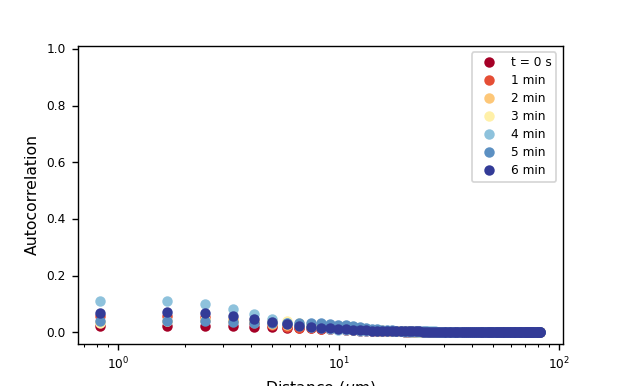

7


In [18]:
##what is "RdYlBu"
cmap=matplotlib.cm.get_cmap('RdYlBu')
####change the figsize and see what is happening
fig, ax= plt.subplots(figsize=(5,5/1.618))
m2p_ratio = 0.8286  # for microscope it is 0.828 micron to pixel ratio (this is from Chris file)
ax.tick_params(axis='both',which='major',labelsize=7)
xvalues=np.arange(len(corr_ravs[0]))*m2p_ratio
#print(xvalues)
markerSize=10
##i think gf1d-relaed to filter
gf1dsize=2
##what is cmap??? and cmap(0)
un="min"
######about minute labeling
###it seems that: 5-20- time=18min so vid-len=18 &findm !=-1 
####so according to the chris code
minut = ["0","1","2","3","4","5","6","7","8","9","10","11"]
####ikey=7 so according to chris
plt.semilogx(xvalues, gf1d(corr_ravs[0],gf1dsize),'.',ms=markerSize,c=cmap(0),label="t = 0 s")
plt.plot(xvalues, gf1d(corr_ravs[1],gf1dsize),'.',ms=markerSize,c=cmap(0.15),label=minut[1]+" "+un)
plt.plot(xvalues, gf1d(corr_ravs[2],gf1dsize),'.',ms=markerSize,c=cmap(0.35),label=minut[2]+" "+un)
plt.plot(xvalues, gf1d(corr_ravs[3],gf1dsize),'.',ms=markerSize,c=cmap(0.45),label=minut[3]+" "+un)
plt.plot(xvalues, gf1d(corr_ravs[4],gf1dsize),'.',ms=markerSize,c=cmap(0.75),label=minut[4]+" "+un)
plt.plot(xvalues, gf1d(corr_ravs[5],gf1dsize),'.',ms=markerSize,c=cmap(0.85),label=minut[5]+" "+un)
plt.plot(xvalues, gf1d(corr_ravs[6],gf1dsize),'.',ms=markerSize,c=cmap(0.99),label=minut[6]+" "+un)
    



plt.xlabel("Distance ($\mu$m)",fontsize=9)
plt.ylabel("Autocorrelation",fontsize=9)
plt.legend(loc=0,fontsize=7)
# plt.locator_params(axis='y',nbins=5)
plt.ylim(-0.04,1.01)
#plt.savefig("autocorr_frame-1.svg",dpi=600)
tweet = ims.shape[0]; print(tweet)

<IPython.core.display.Javascript object>


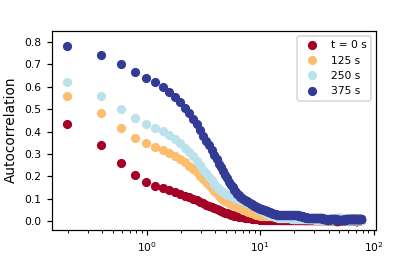

In [219]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(corr_ravs[0]))*0.196
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
gf1dsize=2
plt.semilogx(xvalues, gf1d(corr_ravs[0],gf1dsize),'.',ms=markerSize,c=cmap(0),label="t = 0 s")
plt.plot(xvalues, gf1d(corr_ravs[1],gf1dsize),'.',ms=markerSize,c=cmap(0.33),label='125 s')
plt.plot(xvalues, gf1d(corr_ravs[2],gf1dsize),'.',ms=markerSize,c=cmap(0.67),label='250 s')
plt.plot(xvalues, gf1d(corr_ravs[3],gf1dsize),'.',ms=markerSize,c=cmap(0.99),label='375 s')
plt.xlabel("Distance ($\mu$m)",fontsize=9)
plt.ylabel("Autocorrelation",fontsize=9)
plt.legend(loc=0,fontsize=7)
plt.savefig("autocorr_frames_5-505-1005-1505.svg",dpi=600)

In [179]:
data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\yesmyosin\\20200617_LK16YOYO_AMT_568A_RT_samespot3\\"
data_file = "20200617_LK16YOYO_AMT_568A_RT_samespot3_MMStack_Pos0.ome.tif"

In [180]:
ims = tiff_file.imread(data_dir+data_file,key=[0,2])
print("Shape of ims is %i,%i,%i" % ims.shape)
print("So %i frames of %ix%i pixels each" % ims.shape)

Shape of ims is 2,266,1024
So 2 frames of 266x1024 pixels each


<IPython.core.display.Javascript object>


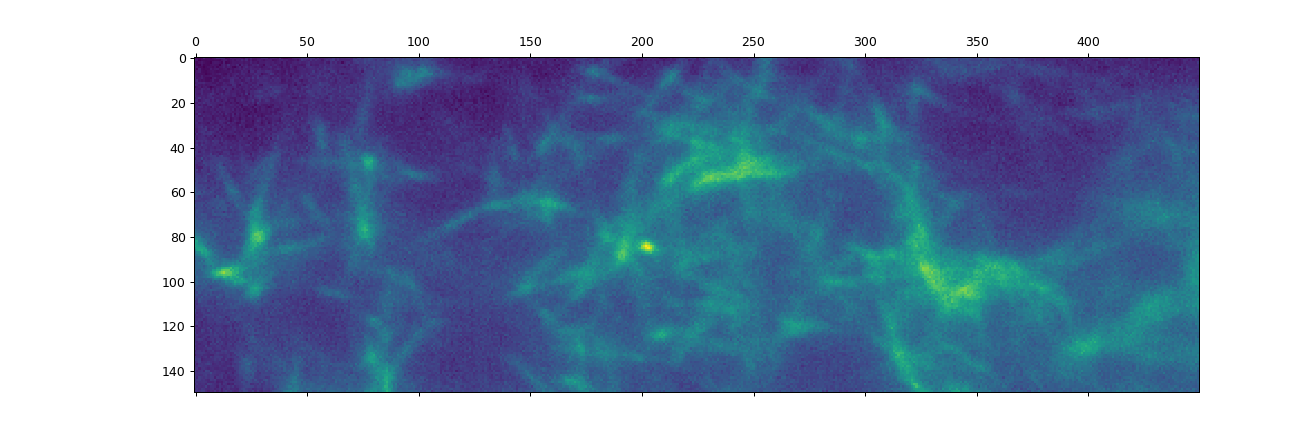

In [181]:
xstart = 329
xstop = xstart+450
ystart = 6
ystop = ystart+150


plt.matshow(ims[1,ystart:ystop,xstart:xstop])

In [25]:
ims_new = ims[:,ystart:ystop,xstart:xstop]

In [190]:
corr_ims = np.zeros_like(ims_new)
corr_ravs = np.zeros((ims_new.shape[0],220))
for i in range(ims_new.shape[0]):
    corr_ims[i], temp = im_corr(ims_new[i],filter=True,filtersize=50)
    corr_ravs[i] = temp[:corr_ravs.shape[1]]

<IPython.core.display.Javascript object>


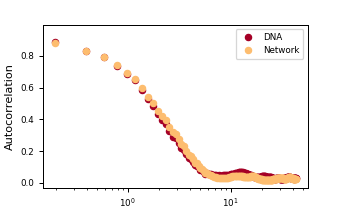

In [191]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(corr_ravs[0]))*0.196
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
plt.semilogx(xvalues, gf1d(corr_ravs[0],1),'.',ms=markerSize,c=cmap(0),label="DNA")
plt.plot(xvalues, gf1d(corr_ravs[1],1),'.',ms=markerSize,c=cmap(0.33),label='Network')
plt.xlabel("Distance ($\mu$m)",fontsize=9)
plt.ylabel("Autocorrelation",fontsize=9)
plt.legend(loc=0,fontsize=7)
#plt.savefig("autocorr_frames_5-505-1005-1505.svg",dpi=600)

In [151]:
def just_fft(image, filter=False, filtersize=30):
    if filter:
        image = image*1.0 - gf(image,filtersize)
    image = image-image.mean()
    image = image/image.std()
    fft_im = abs(fftshift(fft2(image)*np.conj(fft2(image))))/(image.shape[0]*image.shape[1])
    rav_f = ddm.newRadav(fft_im)
    return fft_im, rav_f

In [154]:
fftim_dna, ravf_dna = just_fft(ims_new[0],True,20)
fftim_net, ravf_net = just_fft(ims_new[1],True,20)

<IPython.core.display.Javascript object>


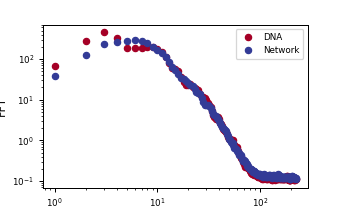

In [155]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(ravf))
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
plt.loglog(xvalues, gf1d(ravf_dna,1),'.',ms=markerSize,c=cmap(0),label="DNA")
plt.plot(xvalues, gf1d(ravf_net,1),'.',ms=markerSize,c=cmap(0.99),label="Network")
plt.xlabel("freq ($\mu$m$^{-1}$)",fontsize=9)
plt.ylabel("FFT",fontsize=9)
plt.legend(loc=0,fontsize=7)
#plt.savefig("autocorr_frames_5-505-1005-1505.svg",dpi=600)

<IPython.core.display.Javascript object>


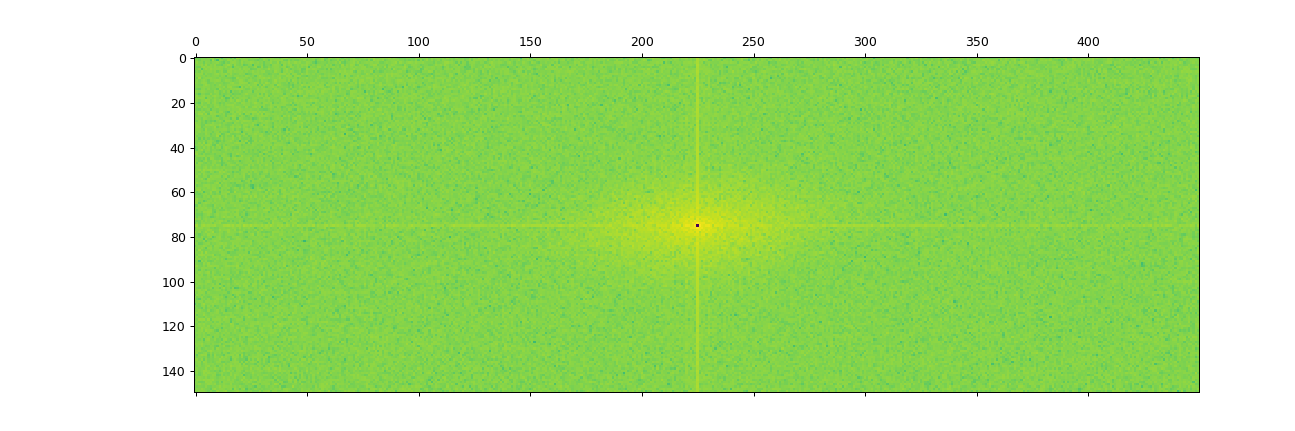

In [57]:
plt.matshow(np.log(fftim_net))

In [58]:
30/0.196


153.0612244897959

<IPython.core.display.Javascript object>


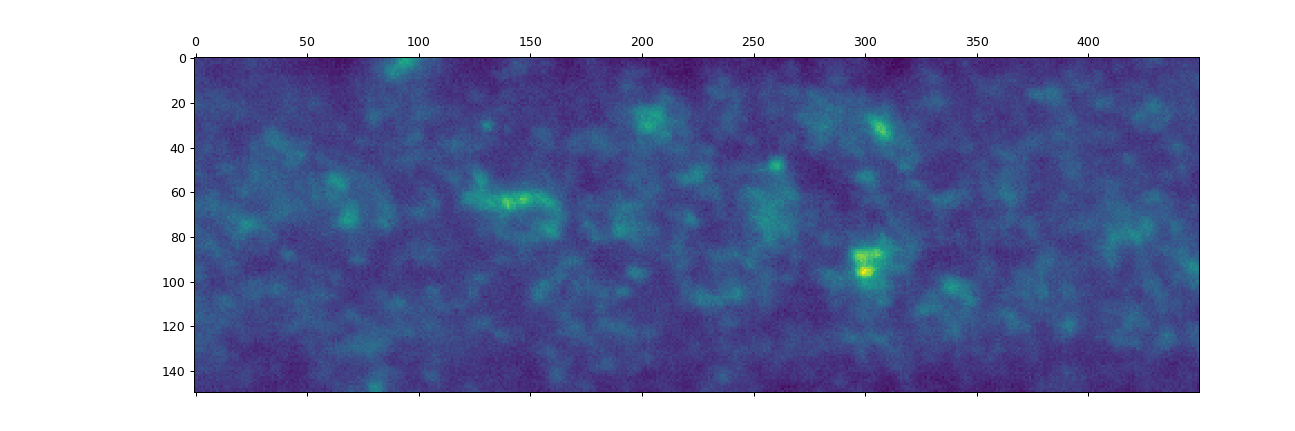

In [192]:
imtest = ims_new[0]*1.0 - uf(ims_new[0],80)
plt.matshow(imtest)

<IPython.core.display.Javascript object>


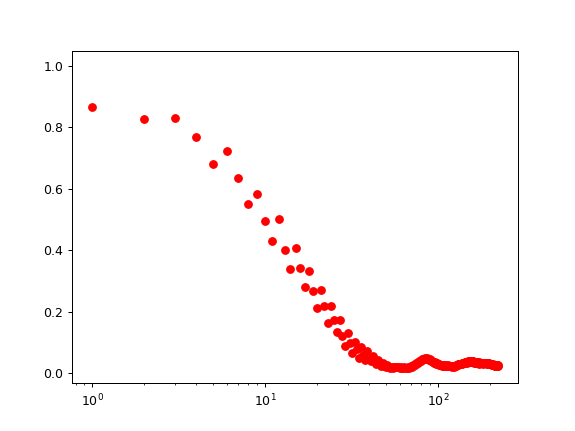

In [81]:
ctest,rtest = im_corr(imtest)
fig=plt.figure()
plt.semilogx(rtest,'ro')

In [67]:
rtest.shape

(224L,)